In [1]:
from empca_residuals import *
from comparison_plots import comp_R2
%pylab inline

 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.


Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [2]:
import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  14
}
matplotlib.rc('font',**font)

In [ ]:
def empca_compare(dr12,dr13,corr12=np.ones(7214),corr13=np.ones(7214)):

    longcorr12 = np.tile(corr12,(dr12.spectra_errs.shape[0],1))
    longcorr13 = np.tile(corr13,(dr13.spectra_errs.shape[0],1))
    
    Vdata12 = np.ma.var(dr12.residuals)
    Vnoise12 = np.ma.mean(np.sqrt(longcorr12*dr12.spectra_errs**2)**2)
    Vdata13 = np.ma.var(dr13.residuals)
    Vnoise13 = np.ma.mean(np.sqrt(longcorr13*dr13.spectra_errs**2)**2)


    dr12.pixelEMPCA(nvecs=5,deltR2=0,mad=False,correction=corr12)
    dr13.pixelEMPCA(nvecs=5,deltR2=0,mad=False,correction=corr13)
    print 'Simple analysis'
    print 'Vnoise12 = {0}, Vdata12 = {1},\nVnoise13 = {2}, Vdata13 = {3}'.format(Vnoise12,Vdata12,Vnoise13,Vdata13)
    print 'R2noise12 = {0}, R2noise13 = {1}'.format(1-Vnoise12/Vdata12, 1-Vnoise13/Vdata13)
    print 'EMPCA'
    print 'Vnoise12 = {0}, Vdata12 = {1},\nVnoise13 = {2}, Vdata13 = {3}'.format(dr12.empcaModelWeight.Vnoise,
                                                                                 dr12.empcaModelWeight.Vdata,
                                                                                 dr13.empcaModelWeight.Vnoise,
                                                                                 dr13.empcaModelWeight.Vdata)
    print 'R2noise12 = {0}, R2noise13 = {1}'.format(dr12.empcaModelWeight.R2noise,dr13.empcaModelWeight.R2noise)
    
    plt.figure(figsize=(10,8))
    plt.plot(dr12.empcaModelWeight.R2Array,label='DR12, R2noise = {0}'.format(dr12.empcaModelWeight.R2noise),
             lw=3,color='b')
    plt.plot(dr13.empcaModelWeight.R2Array,label='DR13, R2noise = {0}'.format(dr13.empcaModelWeight.R2noise),
             lw=3,color='r')
    plt.xlim(0,5)
    plt.ylim(0,1)
    plt.ylabel('R2')
    plt.xlabel('number of eigenvectors')
    plt.axhline(dr12.empcaModelWeight.R2noise,ls='--',lw=2,color='b') 
    plt.axhline(dr13.empcaModelWeight.R2noise,ls='--',lw=3,color='r')
    plt.legend(loc='best')

    plt.figure(figsize=(10,5))
    plt.plot(corr12,label='DR12')
    plt.plot(corr13,label='DR13')
    plt.xlim(0,7214)
    plt.xlabel('pixel')
    plt.ylabel('correction')
    plt.legend(loc='best')
    plt.savefig('n6819_30px_correction.png')

    plt.figure(figsize=(10,5))
    plt.plot(corr12/corr13)
    #plt.ylim(0,69)
    plt.xlim(0,7214)
    plt.xlabel('pixel')
    plt.ylabel('DR12/DR13')
    plt.savefig('n6819_30px_correction_ratio.png')

    plt.figure(figsize=(10,8))
    dr12.imshow(np.sqrt(dr12.spectra_errs**2/longcorr12)/np.sqrt(dr13.spectra_errs**2/longcorr13),
                title = 'ratio of uncorrected uncertainties (DR12/DR13)',cmap='plasma')
    
    plt.figure(figsize=(10,8))
    dr12.imshow(dr12.spectra_errs/dr13.spectra_errs,title = 'ratio of corrected uncertainties (DR12/DR13)',
                cmap='plasma')
    

In [ ]:
d = empca_residuals('apogee','clusters',maskFilter,ask=True)

In [ ]:
_GCS = ['M15','M92','M53','N5466','M13','M2','M3','M5','M107','M71']
CS = np.unique(d.data['CLUSTER'])
_OCS = [i for i in CS if i not in _GCS]
print _OCS

In [ ]:
len(d.data[d.data['CLUSTER']=='N4147'])

In [3]:
m67_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
m67_12.findResiduals()
#corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')
#original12 = np.ma.copy(n6819_12.spectra_errs)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: M67
Data key: done


Done getting filter information


In [4]:
n188_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n188_12.findResiduals()

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N188
Data key: done


Done getting filter information


In [5]:
n2158_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n2158_12.findResiduals()

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N2158
Data key: done


Done getting filter information


In [6]:
n2420_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n2420_12.findResiduals()

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N2420
Data key: done


Done getting filter information


In [7]:
n6791_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6791_12.findResiduals()

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6791
Data key: done


Done getting filter information


In [8]:
n6819_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_12.findResiduals()

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done


Done getting filter information


In [9]:
n7789_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n7789_12.findResiduals()

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N7789
Data key: done


Done getting filter information


In [19]:
#['M35', 'M67', 'N188', 'N2158', 'N2420', 'N4147', 'N6791', 'N6819', 'N7789', 'Pleiades']
npix=30
ocs = [m67_12,n188_12,n2158_12,n2420_12,n6791_12,n6819_12,n7789_12]
ocs = [m67_12,n2158_12]
o = 0
for oc in ocs:
    if o == 0:
        residuals = oc.residuals
        errs = oc.spectra_errs
    else:
        residuals = np.concatenate(residuals,oc.residuals)
        errs = np.concatenate(errs,oc.spectra_errs)
    
cov = np.ma.cov(residuals.T/errs.T)
corr = m67_12.findCorrection(cov=cov,numpix=npix,savename='test.pkl')
n6819_corr = n6819_12.findCorrection(numpix=npix,savename='bla.pkl')

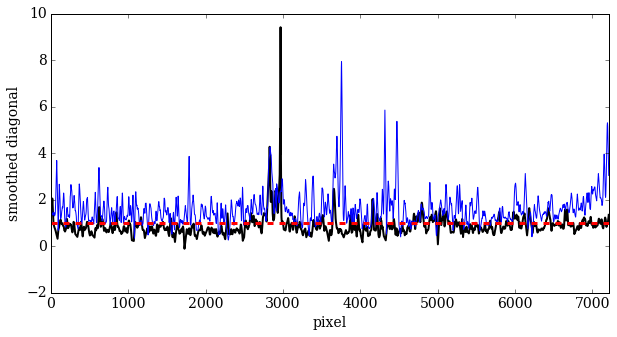

In [20]:
plt.figure(figsize=(10,5))
plt.plot(corr,color='k',lw=2)
plt.plot(n6819_corr,color='b',lw=1)
plt.axhline(1,color='r',lw=3,ls='--')
plt.xlabel('pixel')
plt.ylabel('smoothed diagonal')
plt.xlim(0,7214)
plt.savefig('n6819_dr12_correction.pdf')

In [ ]:
plt.figure(figsize=(10,8))
n6819_12.imshow(n6819_12.cov,xlabel='',ylabel='',zlabel='covariance',vmax=1.5,vmin=-1.5,cmap='plasma')
plt.savefig('n6819_dr12_cov.pdf')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(corr12,color='k',lw=2)
plt.axhline(1,color='r',lw=3,ls='--')
plt.xlabel('pixel')
plt.ylabel('smoothed diagonal')
plt.xlim(0,7214)
plt.savefig('n6819_dr12_correction.pdf')

In [ ]:
npix=30
n6819_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_13.findResiduals()
corr13 = n6819_13.findCorrection(numpix=npix,savename='pickles/n6819_13_30px.pkl')
original13 = np.ma.copy(n6819_13.spectra_errs)

In [ ]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [ ]:
npix=30
n2158_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n2158_12.findResiduals()
corr12 = n2158_12.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
npix=30
n2158_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n2158_13.findResiduals()
corr13 = n2158_13.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
empca_compare(n2158_12,n2158_13,corr12=corr12,corr13=corr13)

In [ ]:
n2158_12.imshow(n2158_12.spectra_errs,vmin=0,vmax=0.02)
plt.figure()
n2158_13.imshow(n2158_13.spectra_errs,vmin=0,vmax=0.02)

In [ ]:
npix=30
m67_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
m67_12.findResiduals()
corr12 = m67_12.findCorrection(numpix=npix,savename='test.pkl')
npix=30
m67_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)
m67_13.findResiduals()
corr13 = m67_13.findCorrection(numpix=npix,savename='test.pkl')
empca_compare(m67_12,m67_13,corr12=corr12,corr13=corr13)

In [ ]:
m67_12.imshow(m67_12.spectra_errs,vmin=0,vmax=0.02)
plt.figure()
m67_13.imshow(m67_13.spectra_errs,vmin=0,vmax=0.02)

In [ ]:
n6819_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_12.findResiduals()
n6819_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_13.findResiduals()
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [ ]:
Vdata12 = np.ma.var(n2158_12.residuals)
Vnoise12 = np.ma.mean(n2158_12.spectra_errs**2)
Vdata13 = np.ma.var(n2158_13.residuals)
Vnoise13 = np.ma.mean(n2158_13.spectra_errs**2)
1-Vnoise12/Vdata12, 1-Vnoise13/Vdata13, Vnoise12, Vdata12, Vnoise13, Vdata13

In [ ]:
npix=50
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
npix=50
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [ ]:
npix=30
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
npix=30
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [ ]:
npix=10
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
npix=10
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
plt.figure()
plt.plot(corr12/corr13)
plt.xlim(4300,4350)
plt.figure()
plt.plot(corr12)
plt.plot(corr13)
plt.xlim(4300,4350)
print corr13[np.where(np.fabs(corr13)<0.005)],np.where(np.fabs(corr13)<0)[0].shape
print corr12[np.where(np.fabs(corr12)<0.005)],np.where(np.fabs(corr12)<0.005)

In [ ]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [ ]:
npix=30
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
npix=30
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')

In [ ]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [ ]:
bound = 0.01
plt.figure(figsize=(20,8))
plt.subplot(121)
n6819_12.imshow(n6819_12.spectra_errs-original12,cmap='bwr',vmin=-bound,vmax=bound)
plt.subplot(122)
n6819_13.imshow(n6819_13.spectra_errs-original13,cmap='bwr',vmin=-bound,vmax=bound)